In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from evaluate import evaluate
from utils import img_parts_generator

Using TensorFlow backend.


In [2]:
def plot_data(img, orig_x1, orig_y1, orig_x2, orig_y2, pred_x1, pred_y1, pred_x2, pred_y2):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
    orig_width = orig_x2 - orig_x1
    orig_height = orig_y2 - orig_y1
    # Create a Rectangle patch
    rect = patches.Rectangle((orig_x1, orig_y1),orig_width, orig_height,linewidth=2,edgecolor='g',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    pred_width = pred_x2 - pred_x1
    pred_height = pred_y2 - pred_y1
    rect = patches.Rectangle((pred_x1, pred_y1),pred_width,pred_height,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

In [3]:
def plot_data_img_str(img, x, y):


    implot = plt.imshow(img)
    plt.plot(x,y,'o', marker=5)
    plt.show()


In [4]:
def plot_data_img(img):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
    
    plt.show()

In [5]:
images, orig_parts, pred_parts = evaluate(get_labels = 30, bb_only=True)



Inceptionv4 Base loaded


/home/ubuntu/birdsnap_dataset/deepbirdsnap/inceptionv4.py:330: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  top_model = Model(input=inputs, output=x)
/home/ubuntu/birdsnap_dataset/deepbirdsnap/inceptionv4.py:391: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("mo..., inputs=Tensor("in...)`
  fused = Model(input=base_inputs, output=top(base(base_inputs)))


Weights loaded


In [6]:
pred_greater = orig_parts[0] > 0
print(pred_greater.shape)
# null_errors = 0

# for y,y_pred in zip(orig_parts,pred_parts):
#     if y==-1:
        
diff= np.abs((pred_parts[0]-orig_parts[0])[pred_greater])
print(diff.shape)
diff.sort()
print(diff)
loss = np.mean(np.abs(diff))
print(loss)


(4,)
(4,)
[ 2.04560089  2.68612671  6.23405457  6.29071045]
4.31412315369


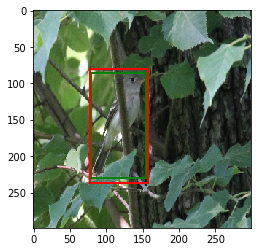

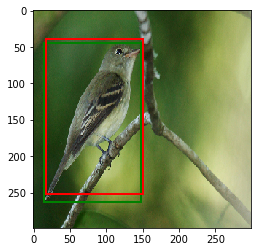

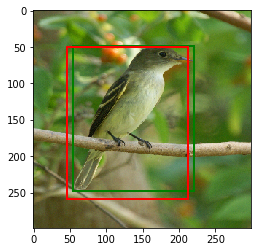

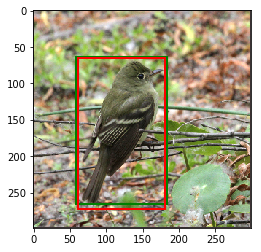

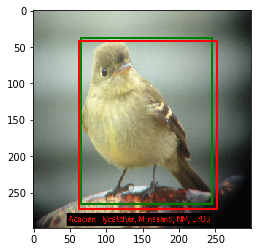

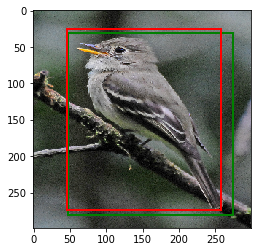

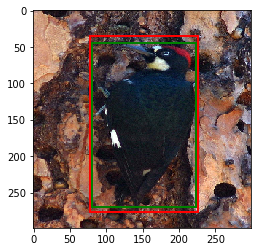

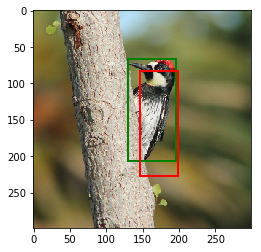

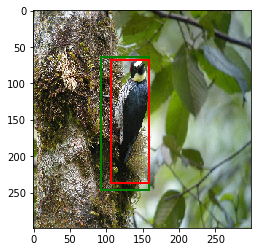

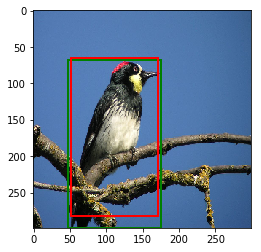

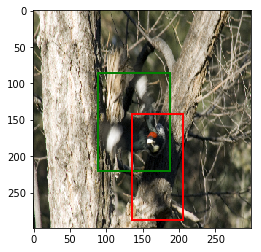

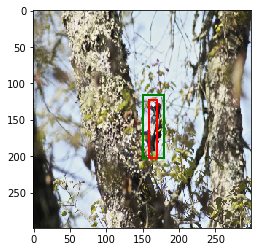

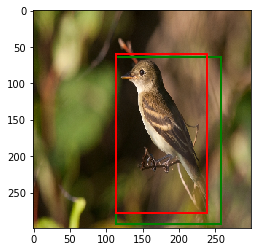

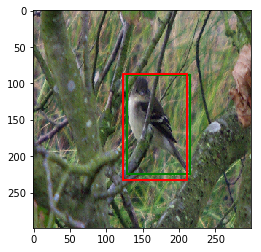

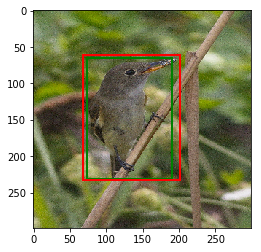

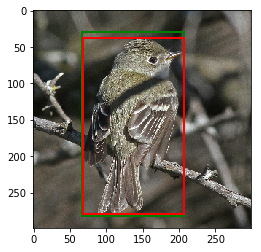

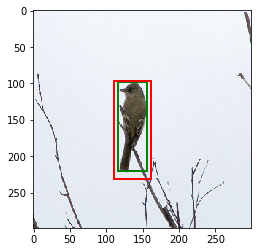

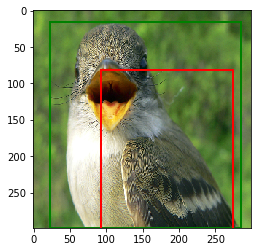

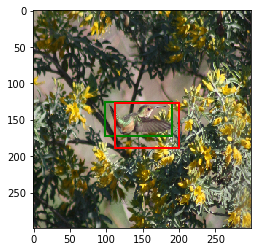

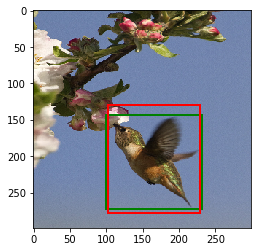

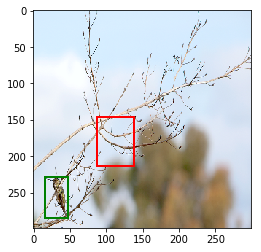

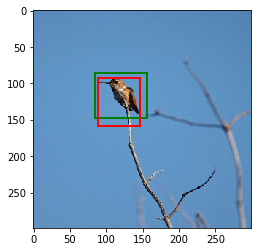

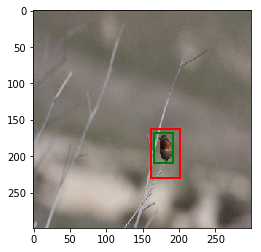

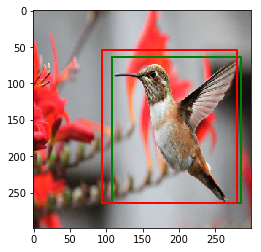

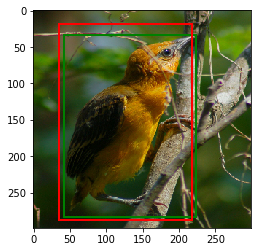

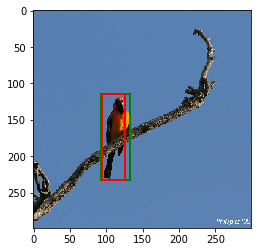

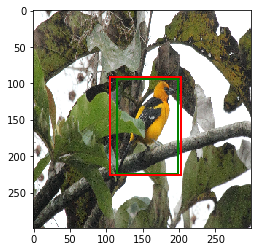

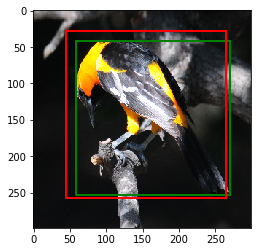

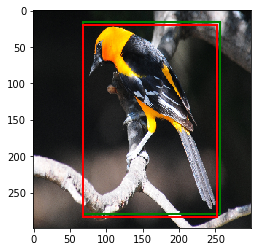

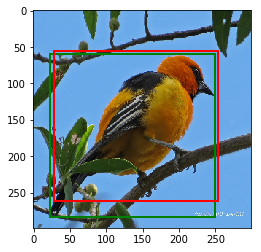

In [7]:
for i in range(len(images)):
    image = images[i]
    
    orig_x1 = orig_parts[i][0]
    orig_y1 = orig_parts[i][1]
    orig_x2 = orig_parts[i][2]
    orig_y2 = orig_parts[i][3]
    
    pred_x1 = pred_parts[i][0]
    pred_y1 = pred_parts[i][1]
    pred_x2 = pred_parts[i][2]
    pred_y2 = pred_parts[i][3]
    
    plot_data(image, orig_x1, orig_y1, orig_x2, orig_y2, pred_x1, pred_y1, pred_x2, pred_y2)